Atėjo metas sujungti visas žinias į vieną vietą, tam pasitelksime didesnės apimties užduotį:

Parsisiųskite šį dataset: https://archive.ics.uci.edu/dataset/109/wine (galite rinktis ir bet kurį kitą, jus dominantį dataset)

atlikite žemiau nurodytus žingsnius:

Žingsniai:

1. Duomenų užkrovimas ir paruošimas
2. Klasterizavimas
    2.1. Hierarchinis klasterizavimas
    2.2. K-vidurkių klasterizavimas
    2.3. DBSCAN klasterizavimas
3. Klasifikavimas
    3.1. Decision Trees
    3.2. Random Forests
    3.3. Naive Bayes
    3.4. Regresija
    3.5. Linijinė regresija
    3.6. Polinominė regresija
4. Modelio vertinimas
    4.1. Tikslumas, jautrumas, specifiškumas
    4.2. ROC ir AUC analizė
5. Hiperparametrų optimizavimas
    5.1. Grid Search
6. Modelių interpretavimas

Atlikus visus šiuos punktus aprašykite išvadą: kokie žingsniai buvo atlikti paruošiant duomenis, kuris klasterizavimo metodas buvo labiausiai tinkamas ir dėl kokių priežasčių, kuris klasifikavimo metodas buvo tinkamiausias, ką sužinote iš modelio vertinimo, kokie hiperparametrai yra geriausi? Taip pat pritaikykite modelio interpretavimą keliems įrašams (pavieniui) argumentuotai atsakykite kodėl vienas įrašas yra klasifikuojamas yra būtent prie tam tikros klasės.

In [7]:
# Duomenų užkrovimas ir paruošimas
import pandas as pd 

column_names = ['Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length', 'Eccentricity', 'Convex Area', 'Extent', 'Class']
rice = pd.read_csv('rice+cammeo+and+osmancik/Rice_Cammeo_Osmancik.csv', header = None, names=column_names)
rice

,Area,Perimeter,Major Axis Length,Minor Axis Length,Eccentricity,Convex Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


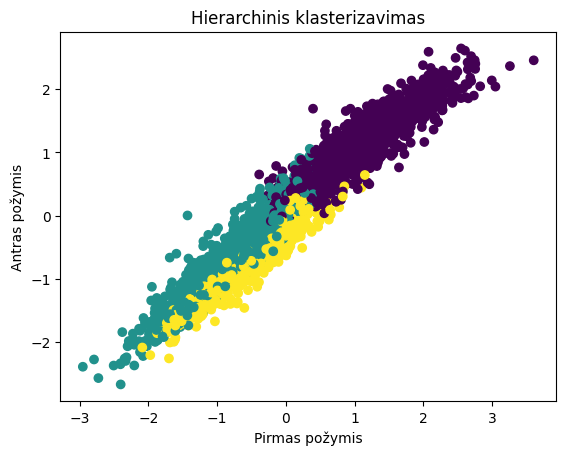

In [10]:
# 2.1. Hierarchinis klasterizavimas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = rice.drop('Class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# print(X)
# 3. Hierarchinis klasterizavimas
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

# Vizualizuojame rezultatus
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_hc, cmap='viridis')
plt.xlabel('Pirmas požymis')
plt.ylabel('Antras požymis')
plt.title('Hierarchinis klasterizavimas')
plt.show()

# 5. Klasterių priskyrimas prie originalių duomenų
rice['Cluster'] = y_hc
# print(rice.head())

c:\Users\edita\Documents\KURSAI\240319DMO492DIE\mokymai\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\edita\Documents\KURSAI\240319DMO492DIE\mokymai\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


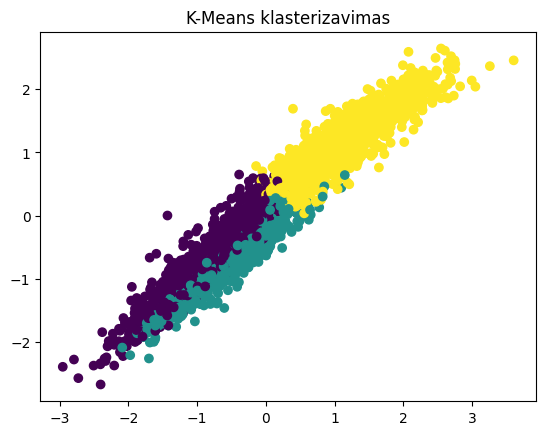

In [11]:
# 2.2. K-vidurkių klasterizavimas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standartizuojame duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializuojame KMeans modelį
kmeans = KMeans(n_clusters=3, random_state=42)

# Apmokome modelį
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Gavome spėjimus (cluster labels)
labels = kmeans.labels_

# Vizualizuojame rezultatus
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means klasterizavimas')
plt.show()

Atrasti klasteriai: 6
Atrastos triukšmo taškų: 258


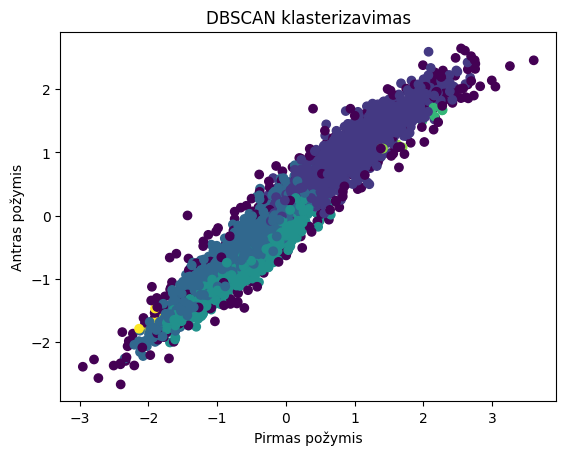

In [12]:
# 2.3. DBSCAN klasterizavimas
from sklearn.cluster import DBSCAN

# Inicializuojame DBSCAN modelį
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Apmokome modelį
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Gavome spėjimus (cluster labels)
labels = dbscan.labels_

# Pasitikrinkime, kiek klasterių buvo rasta (atmetame 'outlier' klasę)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Atrasti klasteriai:', n_clusters_)
print('Atrastos triukšmo taškų:', n_noise_)

# Vizualizuojame rezultatus
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Pirmas požymis')
plt.ylabel('Antras požymis')
plt.title('DBSCAN klasterizavimas')
plt.show()

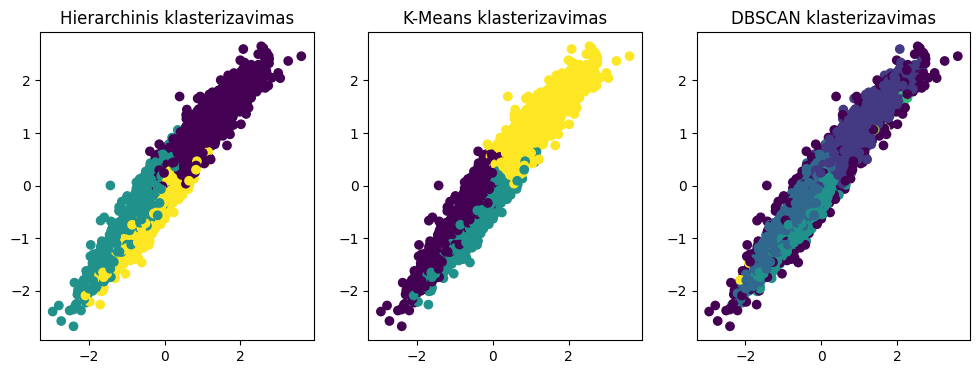

In [15]:
plt.figure(figsize=(12,4))
# Vizualizuojame rezultatus(Hierarchinis)
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_hc, cmap='viridis')
plt.title('Hierarchinis klasterizavimas')

# Vizualizuojame rezultatus(K-Means)
plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means klasterizavimas')

# Vizualizuojame rezultatus (DBSCAN)
plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN klasterizavimas')

plt.show()

In [ ]:
# 3. Klasifikavimas
#     3.1. Decision Trees
#     3.2. Random Forests
#     3.3. Naive Bayes
#     3.4. Regresija
#     3.5. Linijinė regresija
#     3.6. Polinominė regresija

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = rice.drop('Class', axis=1)
# print(X)
y = rice['Class']
# print(y)
# Išskaidome duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
# Atliekame spėjimus su testavimo rinkiniu
y_pred_dt = dt_model.predict(X_test)
print(y_pred_dt)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(y_pred_rf)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(y_pred_nb)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred_lin_reg = lin_reg_model.predict(X_test)
print(y_pred_lin_reg)

poly_reg_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg_model.fit(X_train, y_train)
y_pred_poly_reg = poly_reg_model.predict(X_test)
print(y_pred_poly_reg)

['Cammeo' 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik'
 'Cammeo' 'Cammeo' 'Cammeo' 'Osmancik' 'Cammeo' 'Cammeo' 'Osmancik'
 'Cammeo' 'Cammeo' 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Cammeo'
 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik'
 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Cammeo'
 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Cammeo'
 'Cammeo' 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Osmancik' 'Osmancik'
 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Osmancik'
 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik'
 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik'
 'Osmancik' 'Cammeo' 'Cammeo' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik'
 'Cammeo' 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Osmancik' 'Osmancik'
 'Cammeo' 'Cammeo' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik'
 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik' 'Cammeo' 'Cammeo' 'Osmancik'

ValueError: could not convert string to float: 'Osmancik'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline